<a href="https://colab.research.google.com/github/JuanD-Silva/Python-and-Statistics-for-Financial-Analysis/blob/main/Modulo_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Population** and **Sample**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
data = pd.DataFrame()
data['Population'] = [47, 48, 85, 20, 19, 13, 72, 16, 50, 60]

In [9]:
a_sample_with_replacement = data['Population'].sample(5, replace=True)
print(a_sample_with_replacement)

4    19
4    19
4    19
8    50
4    19
Name: Population, dtype: int64


In [11]:
a_sample_without_replacement = data['Population'].sample(5, replace=False)
print(a_sample_without_replacement)

1    48
0    47
9    60
2    85
7    16
Name: Population, dtype: int64


# Parameters and Statistics


In [13]:
#Calculate mean and variance
population_mean=data['Population'].mean()
population_var=data['Population'].var()
print(population_mean)
print(population_var)

43.0
635.3333333333334


In [14]:
a_sample= data['Population'].sample(10, replace=True)
sample_mean=a_sample.mean()
sample_var=a_sample.var()
print(sample_mean)
print(sample_var)


39.5
858.5


In [15]:
sample_length = 500
sample_variance_collection = [data['Population'].sample(10, replace=True).var() for i in range(sample_length)]
print(np.mean(sample_variance_collection))

572.7903111111111


# Variation of Sample

In [17]:
Fstsample = pd.DataFrame(np.random.normal(10,5, size=30))
print('sample mean is', Fstsample.mean())
print('sample SD is', Fstsample.std(ddof=1))

sample mean is 0    9.816131
dtype: float64
sample SD is 0    5.764098
dtype: float64


# **Empirical Distribution of mean**

In [32]:
meanlist = []
for t in range(10000):
    sample = pd.DataFrame(np.random.normal(10, 5, size=30))
    meanlist.append(sample[0].mean())

In [33]:
collection = pd.DataFrame()
collection['meanlist'] = meanlist

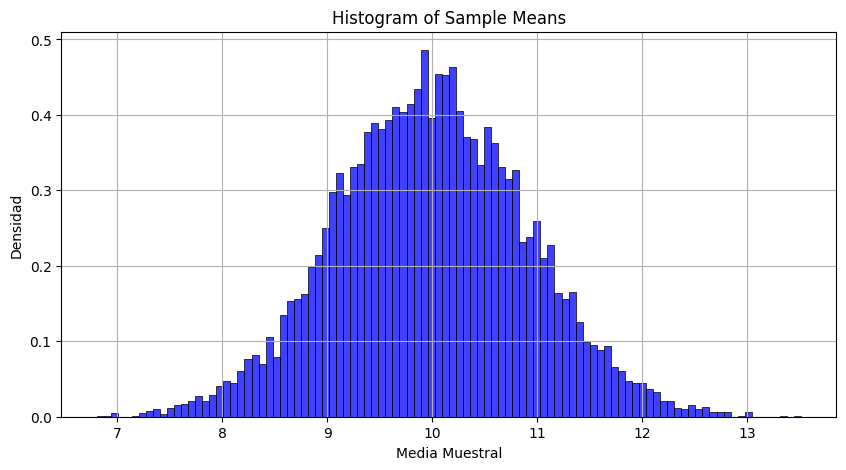

In [36]:

# Configurar tamaño del gráfico
plt.figure(figsize=(10,5))

# Crear histograma con más bins y normalización
sns.histplot(collection['meanlist'], bins=100,  stat="density", color="blue")

# Configurar etiquetas y estilo
plt.title("Histogram of Sample Means")
plt.xlabel("Media Muestral")
plt.ylabel("Densidad")
plt.grid(True)

# Mostrar gráfico
plt.show()



# **Sampling from arbritary distribution**

<Axes: xlabel='meanlist', ylabel='Density'>

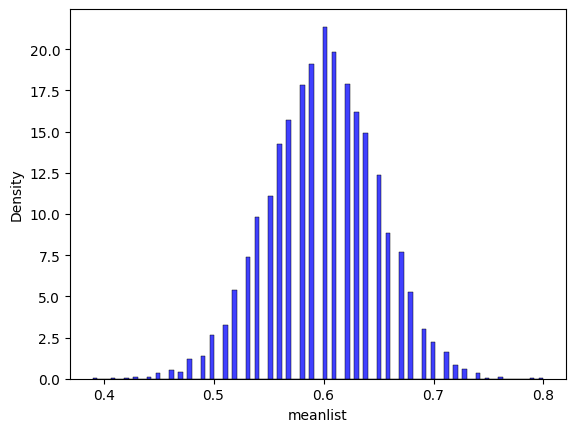

In [43]:
sample_size = 100
samplemeanlist = []
apop =  pd.DataFrame([1, 0, 1, 0, 1])
for t in range(10000):
    sample = apop[0].sample(sample_size, replace=True)  # small sample size
    samplemeanlist.append(sample.mean())

acollec = pd.DataFrame()
acollec['meanlist'] = samplemeanlist
sns.histplot(acollec['meanlist'], bins=100,  stat="density", color="blue")


In [2]:
ms = pd.read_csv('/content/microsoft.csv')
ms.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500
1,2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900
2,2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900
3,2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900
4,2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100


# **Estimate the average stock return with 90% Confidence Interval**

In [46]:
ms['logReturn'] = np.log(ms['Close'].shift(-1)) - np.log(ms['Close'])

In [50]:
import scipy.stats

sample_size = ms['logReturn'].shape[0]
sample_mean = ms['logReturn'].mean()
sample_std = ms['logReturn'].std(ddof=1) / sample_size**0.5

#Now you can use scipy.stats.norm.ppf
z_left = scipy.stats.norm.ppf(0.05)
z_right = scipy.stats.norm.ppf(0.95)

interval_left = sample_mean + z_left * sample_std
interval_right = sample_mean + z_right * sample_std


print('90% confidence interval is ', (interval_left, interval_right))

90% confidence interval is  (-1.560325389937862e-05, 0.001656066226145423)


**z_left y z_right** representan los valores críticos de la distribución normal estándar.
Para un IC del 90%, los valores corresponden a
𝑧
=
±
1.645
z=±1.645 (de la tabla Z).

📌 Fórmula para cuantiles en una normal estándar:
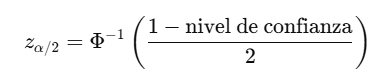

# **Hypothesis testing**

In [3]:
ms['LogReturn'] = np.log(ms['Close'].shift(-1)) - np.log(ms['Close'])

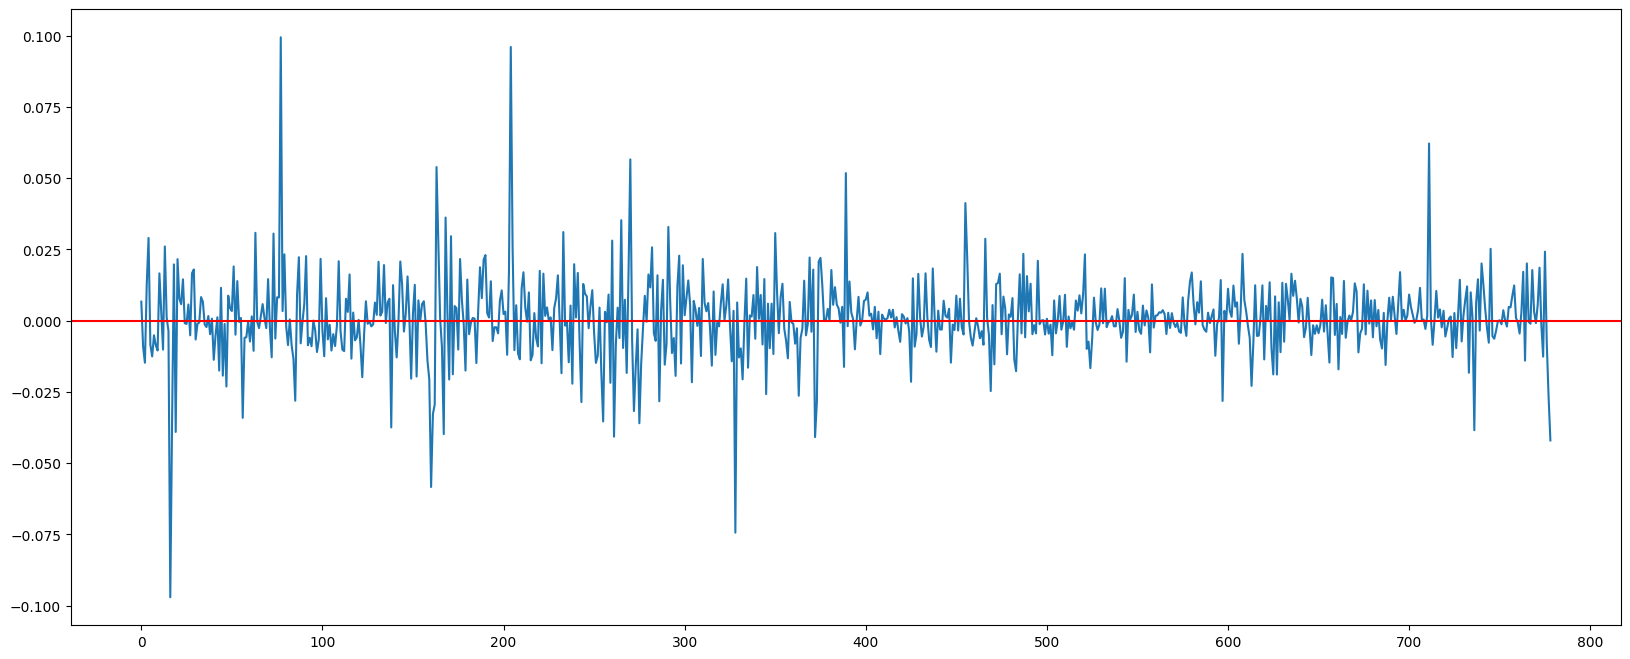

In [6]:
ms['LogReturn'].plot(figsize=(20,8))
plt.axhline(0, color='red')
plt.show()

## Steps involved in testing a claim by hypothesis testing
### Step 1: Set hypothesis

$H_0 : \mu = 0$
$H_a : \mu \neq 0$

H0 means the average stock return is 0

H1 means the average stock return is not equal to 0

### Step 2: Calculate test statistic




In [7]:
sample_mean = ms['LogReturn'].mean()
sample_std = ms['LogReturn'].std(ddof=1)
n = ms['LogReturn'].shape[0]

# if sample size n is large enough, we can use z-distribution, instead of t-distribtuion
# mu = 0 under the null hypothesis
zhat= (sample_mean - 0) / (sample_std / np.sqrt(n))
print(zhat)

1.6141477140003675


# Step 3: Set desicion criteria

In [8]:
#confidence level
alpha = 0.05

zleft = norm.ppf(alpha/2,0,1)
zright = -zleft
print(zleft)
print(zright)


-1.9599639845400545
1.9599639845400545


### Step 4:  Make decision - shall we reject H0?

In [9]:
print('At significant level of {}, shall we reject: {}'.format(alpha, zhat>zright or zhat<zleft))

At significant level of 0.05, shall we reject: False


# Second hipotesis
$H_0 : \mu \leq 0$

$H_a : \mu > 0$

In [11]:


zhat= (sample_mean - 0) / (sample_std / np.sqrt(n))
print(zhat)

1.6141477140003675


In [12]:
# step 3
alpha = 0.05

zright = norm.ppf(1-alpha, 0, 1)
print(zright)

1.6448536269514722


In [14]:
# step 4
print('At significant level of {}, shall we reject: {}'.format(alpha, zhat>zright))

At significant level of 0.05, shall we reject: False


# An alternative method: p-value

In [15]:
# step 3 (p-value)
p = 1 - norm.cdf(zhat, 0, 1)
print(p)

0.053247694996968464


In [16]:
print('At significant level of {}, shall we reject: {}'.format(alpha, p < alpha))

At significant level of 0.05, shall we reject: False
